# Libraries Used


1. serial - pip install pyserial
1. matplotlib - pip install matplotlib
1. numpy - pip install numpy



# Getting gata from Serial Port 

We need a microcontroller that will process all the values for us then return the results( desired values ).

In order to plot these vales we need to create a script to get all the data coming from serial port.

We are currently using Arduino for testing.




# Code

``` ino

// Below is test code runnig on Arduino it will create a sawtooth waveform

byte i = 0;

void setup() {

  Serial.begin(9600);
}

void loop() {

  if(i >= 100){i = 0;}

  Serial.println(i);

  delay(50);

  i++; 
}


```

### In order to get all these values from the serial port we will be using the code given below

```py

import serial as ser
import matplotlib.pyplot as myplot
import numpy as np

port = '/dev/ttyACM0'       # port to which the arduino is connected
baud_rate = 9600            # baud rate same as used in Arduino code

mySerial = ser.Serial(port,baud_rate)

mySerial.close()             
mySerial.open()             

myplot.close('all')         
myplot.figure()
myplot.ion()
myplot.show()               

dataset = np.array([])      

while True:

    data_in_binary = s.readline()           # something like ----->   data_in_binary = b'15\r\n'
    data_decoded = data_in_binary.decode()  #                ----->   data = '15\r\n'
    data = float(data_decoded[:-2])         #                ----->   data = float('15') = 15 

    dataset = np.append(dataset , data) 
      
    myplot.cla()
    myplot.plot(dataset)
    myplot.pause(0.0001)

```


# Unfortunately 

We can't test this in notebook.
What we can do is create a set of data, save it in a list and then plot it.
As shown below.


<function matplotlib.pyplot.show(close=None, block=None)>

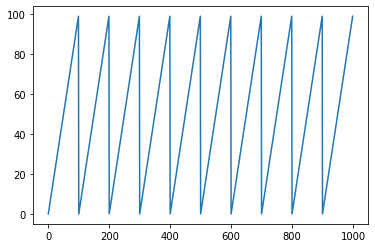

In [10]:
data = []
num = 0

for i in range(0,1000):
    if( num >= 100):
        num = 0

    data.append(num)  
    num += 1


import matplotlib.pyplot as plt

plt.close('all')
plt.plot(data)
plt.show


# Final requred output (dummy)

This is just for reference

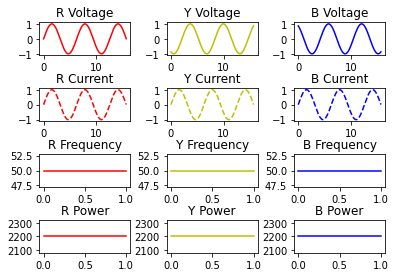

In [11]:
import numpy as np
import matplotlib.pyplot as plt


plt.close('all')

c = 2.094
t = np.arange(0,5*np.pi,0.1)
f = [50,50]
p = [2200,2200]

#plot voltage
plt.subplot(4,3,1)
plt.plot(t,np.sin(t),'r')
plt.title("R Voltage")

plt.subplot(4,3,2)
plt.plot(t,np.sin(t - c) ,'y')
plt.title("Y Voltage")

plt.subplot(4,3,3)
plt.plot(t,np.sin(t + c),'b')
plt.title("B Voltage")

#plot current
plt.subplot(4,3,4)
plt.plot(t,np.sin(t),'r--')
plt.title("R Current")

plt.subplot(4,3,5)
plt.plot(t,np.sin(t),'y--')
plt.title("Y Current")

plt.subplot(4,3,6)
plt.plot(t,np.sin(t),'b--')
plt.title("B Current")

# plot frequency
plt.subplot(4,3,7)
plt.plot(f,'r')
plt.title("R Frequency")

plt.subplot(4,3,8)
plt.plot(f,'y')
plt.title("Y Frequency")

plt.subplot(4,3,9)
plt.plot(f,'b')
plt.title("B Frequency")

# plot power
plt.subplot(4,3,10)
plt.plot(p,'r')
plt.title("R Power")

plt.subplot(4,3,11)
plt.plot(p,'y')
plt.title("Y Power")

plt.subplot(4,3,12)
plt.plot(p,'b')
plt.title("B Power")


# to add custom space between subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)